Télécharger cet IPython-Notebook : [Chiffre_Spirale.ipynb](Chiffre_Spirale.ipynb)
<p style="text-align:center;font-size:300%">Spirale</p>
****

# Le chiffre Spirale

Le chiffre Spirale est un système cryptographique conçu par Philippe Allard.  
Il est décrit dans son article [SPIRALE - Le chiffrement manuel revisité](http://www.cjoint.com/c/EGittdyk2EK).

Ce système est basé sur une table de Vigenère à alphabets désordonnés.
Plutôt que d'utiliser la répétition d'un mot-clé pour sélectionner les alphabets comme on le fait classiquement, le système utilise un générateur pseudo-aléatoire pour obtenir une clé de chiffrement potentiellement infinie, sans répétition.

La première chose à comprendre est la génération d'un alphabet d'après un mot-clé.

## Génération des alphabets

En cryptographie, on prend pour ordre d'une lettre son rang dans l'alphabet en commençant par 0.
Le rang de A est 0, celui de B est 1, ...etc.  
Les nombres sont commodes pour les calculs mais les lettres sont préférables pour la lecture des résultats. Commençons par définir quatre fonctions auxiliaires qui permettent de passer d'une représentation à l'autre.

In [3]:
def rng(c):
    """Retourne le rang d'un caractère A -> 0, B -> 1 ...etc."""
    return ord(c)-ord('A')

In [4]:
def str2rng(s):
    """Retourne la liste des rangs des caractères d'une chaîne."""
    return [rng(c) for c in s]

In [5]:
str2rng("ABCDEF")

[0, 1, 2, 3, 4, 5]

In [6]:
def car(r):
    """Retourne le caractère correspondant au rang donné r"""
    return chr(r+ord('A'))

In [7]:
def rng2str(liste_rangs):
    """Retourne la chaîne de caractères associée à une liste de rangs"""
    return ''.join((car(r)) for r in liste_rangs)

In [8]:
rng2str([0, 1, 2, 3, 4, 5])

'ABCDEF'

La fonction suivante renvoie un "alphabet-Spirale" construit à partir d'un mot-clé (de 7 lettres dans le système Spirale). 

In [9]:
def alpha_spirale(keyword):
    """Calcule un alphabet-Spirale à partir d'un mot-clé"""
    keyword = keyword.upper()
    offset = str2rng(keyword)               # buffer circulaire des décalages
    roundbuffer = list(range(25, -1, -1))   # buffer circulaire des "lettres" rng('Z')..rng('A')
    i, j = 0, 0
    alpha = []
    while roundbuffer:
        i += offset[j]
        i %= len(roundbuffer)
        j += 1
        j %= len(keyword)
        alpha.append(roundbuffer[i])
        del roundbuffer[i]
    return alpha

Tous les tests qui suivent reproduisent l'exemple détaillé de l'annexe D de l'article Ph. Allard.

In [10]:
print(rng2str(alpha_spirale('NVIKKIH')))

MQGVIYOWRDLUEPKNTJCAXBSZHF


In [11]:
print(rng2str(alpha_spirale('CTSQEOU')))

XDJQLTSOMIHBANFPUWECVGKZYR


La fonction utilitaire suivante calcule l'alphabet réciproque d'un alphabet donné sous forme d'une liste numérique.

In [12]:
def inverse_permutation(permut):
    """Renvoie la permutation réciproque d'une permutation de [0; n] donnée"""
    inv = [0]*len(permut)
    for i in range(len(permut)):
        inv[permut[i]] = i        # on veut inv o permut = Id
    return inv

In [13]:
print(inverse_permutation([1, 2, 0, 3, 5, 4]))

[2, 0, 1, 3, 5, 4]


## Table de Vigenère

Avec deux mots-clés, _key1_ et _key2_, on construit deux alphabets qui permettent, à partir d'une table de Vigenère normale, de définir une table de Vigenère à alphabets désordonnés : on remplace la marge gauche par le premier alphabet et la marge supérieure par le second alphabet.   
Si $f$ et $g$ sont les substitutions mono-alphabétiques associées aux alphabets-Spirale associés respectivement à _key1_ et _key2_, la table de Vigenère obtenue correspond à l'opération $\Box$ : $a\,\Box\, b \equiv f^{-1}(a) + g^{-1}(b) \mod{26}$
où $a$ et $b$ sont les rangs des lettres.

Écrivons une fonction qui construit la table de Vigenère associée à _key1_ et _key2_.

In [14]:
def Vigenère( key1, key2):
    """Construit une table de Vigenère à partir des mots-clés key1 et key2"""
    f = alpha_spirale(key1)
    fi = inverse_permutation(f)  # f^-1 f inverse
    g = alpha_spirale(key2)
    gi = inverse_permutation(g)  # g^-1 g inverse
    vigenere = [[0]*26 for i in range(26)]  # initialisation tableau dim 2
    for a in range(26):
        for b in range(26):
            vigenere[a][b] = (fi[a]+gi[b])%26
    return vigenere

In [15]:
v = Vigenère('NVIKKIH','CTSQEOU')

La fonction suivante affiche la table de Vigenère passée en argument.

In [16]:
def print_Vigenere(v):
    """Affiche une table de Vigenère sur la console"""
    print('   A B C D E F G H I J K L M N O P Q R S T U V W X Y Z')
    for a in range(26):
        print(car(a)+": ", end = '')
        for b in range(26):
            print(car(v[a][b])+' ', end = '')
        print()

In [17]:
print_Vigenere(v)

   A B C D E F G H I J K L M N O P Q R S T U V W X Y Z
A: F E M U L H O D C V P X B G A I W S Z Y J N K T R Q 
B: H G O W N J Q F E X R Z D I C K Y U B A L P M V T S 
C: E D L T K G N C B U O W A F Z H V R Y X I M J S Q P 
D: V U C K B X E T S L F N R W Q Y M I P O Z D A J H G 
E: Y X F N E A H W V O I Q U Z T B P L S R C G D M K J 
F: L K S A R N U J I B V D H M G O C Y F E P T Q Z X W 
G: O N V D U Q X M L E Y G K P J R F B I H S W T C A Z 
H: K J R Z Q M T I H A U C G L F N B X E D O S P Y W V 
I: Q P X F W S Z O N G A I M R L T H D K J U Y V E C B 
J: D C K S J F M B A T N V Z E Y G U Q X W H L I R P O 
K: A Z H P G C J Y X Q K S W B V D R N U T E I F O M L 
L: W V D L C Y F U T M G O S X R Z N J Q P A E B K I H 
M: M L T B S O V K J C W E I N H P D Z G F Q U R A Y X 
N: B A I Q H D K Z Y R L T X C W E S O V U F J G P N M 
O: S R Z H Y U B Q P I C K O T N V J F M L W A X G E D 
P: Z Y G O F B I X W P J R V A U C Q M T S D H E N L K 
Q: N M U C T P W L K D X F J O I Q E A H G R V S 

La table précédente est la table de l'exemple détaillé Annexe D2 (avec les lignes et les colonnes dans l'ordre alphabétique).

## Générateur pseudo-aléatoire

Le générateur pseudo-aléatoire de Spirale est du type Fibonacci retardé : [Lagged Fibonacci generator](https://en.wikipedia.org/wiki/Lagged_Fibonacci_generator) mais il utilise l'opération $\square$ au lieu de l'addition modulo 26. Il est défini par la relation de récurrence ($n\geqslant 49$) : $$X_n = X_{n-49}\,\square\, X_{n-24}$$
c'est-à-dire, numériquement :
$$X_n \equiv f^{-1}(X_{n-49})+g^{-1}(X_{n-24}) \mod 26$$
Il nécessite un *vecteur d'initialisation* (VI) de dimension 49. Ce VI est construit à partir de deux mots-clés _key3_ et _key4_ de 7 lettres chacun. On dresse une table carrée de $7\times 7$ en composant les lettres des mots clés avec l'opération $\square$.  
Avec _key3_ = DNGDKSZ et _key4_ = EAIWDSH, on obtient le tableau :

```
   E_A_I_W_D_S_H
D: B V S A K P T
N: H B Y G Q V Z
G: U O L T D I M
D: B V S A K P T
K: G A X F P U Y
S: O I F N X C G
Z: P J G O Y D H
```
On relève les valeurs en diagonale en commençant par le coin supérieur gauche. Le VI est donc  
```
BHVUBSBOYAGVLGKOASTQPPIXADVTJFFKIZGNPPMOXUTYCYDGH
```
Écrivons une fonction qui calcule le vecteur d'initialisation.

In [18]:
def get_IV (key1, key2, key3, key4):
    """Retourne le VI à partir des 4 clés"""
    f = alpha_spirale(key1)
    fi = inverse_permutation(f)  # f^-1 f inverse
    g = alpha_spirale(key2)
    gi = inverse_permutation(g)  # g^-1 g inverse
    table = [[0]*7 for i in range(7)]  # initialisation table 7x7
    for i in range(7):
        for j in range(7):
            table[i][j] = (fi[rng(key3[i])]+gi[rng(key4[j])])%26
    i, j = 0, 0
    IV = []
    for k in range(49):         # lecture en diagonale
        IV.append(table[i][j])
        i -= 1
        j += 1
        if i < 0:             # première moitié
            i = i + j + 1
            j = 0
            if i > 6:         # fin diagonale
                i, j = 6, 1
        if j > 6:             # seconde moitié
            j = i + j - 5
            i = 6
    return IV

In [19]:
rng2str(get_IV('NVIKKIH','CTSQEOU', 'DNGDKSZ', 'EAIWDSH'))

'BHVUBSBOYAGVLGKOASTQPPIXADVTJFFKIZGNPPMOXUTYCYDGH'

Passons au générateur proprement dit :

In [20]:
def gen(key1, key2, key3, key4):
    f = alpha_spirale(key1)
    fi = inverse_permutation(f)  # f^-1 f inverse
    g = alpha_spirale(key2)
    gi = inverse_permutation(g)  # g^-1 g inverse
    i = 0
    IV = get_IV(key1, key2, key3, key4)
    while (1):
        if i < 49:
            yield IV[i]
            i += 1
        else:
            new = (fi[IV[0]]+gi[IV[25]])%26
            del IV[0]
            IV.append(new)
            yield new

In [21]:
mask = gen('NVIKKIH','CTSQEOU', 'DNGDKSZ', 'EAIWDSH')
rng2str([next(mask) for i in range(75)])

'BHVUBSBOYAGVLGKOASTQPPIXADVTJFFKIZGNPPMOXUTYCYDGHWSINJKRPCOPSZKVGJBOULOZEKP'

## Chiffrement

La procédure de chiffrement Spirale consiste à combiner chaque lettre du texte clair avec la lettre fournie par le générateur pseudo-aléatoire (masque).  
Si $P$ est la lettre du *plaintext* (clair), $M$ la lettre du masque et $C$ la lettre du crypto, on a
$$C = P\,\square\,M$$
c'est-à-dire, numériquement :
$$C \equiv f^{-1}(P)+g^{-1}(M) \mod{26}$$
La fonction suivante assure le chiffrement suivant ce procédé.

In [22]:
def chiffrer(key1, key2, key3, key4, plaintxt):
    """Fonction de chiffrement Spirale"""
    f = alpha_spirale(key1)
    fi = inverse_permutation(f)  # f^-1 f inverse
    g = alpha_spirale(key2)
    gi = inverse_permutation(g)  # g^-1 g inverse
    mask = gen(key1, key2, key3, key4)
    crypto = []
    for c in plaintxt:
        crypto.append( (fi[rng(c)]+gi[next(mask)])%26 )
    return rng2str(crypto)

In [23]:
plain = 'SPIRALEISAONETIMEPADCRYPTOSYSTEMDESIGNEDTOREPLACESOLITAIREWHENONEHASNOCARDS'
chiffrer('NVIKKIH','CTSQEOU','DNGDKSZ', 'EAIWDSH', plain)

'HXYYEQXLUFBJQLAHYTYMHXONCHQKYEAWSJRRREUQQWNKGIUNWNMTRSPDXFONSMCJHAEDFKZQAFL'

## Déchiffrement

Pour déchiffrer, on inverse la formule de chiffrement $C \equiv f^{-1}(P)+g^{-1}(M) \mod 26$, ce qui donne $$P \equiv f(C - g^{-1}(M)) \mod{26}$$ 
La fonction suivante assure le déchiffrement :

In [24]:
def déchiffrer(key1, key2, key3, key4, crypto):
    """Fonction de déchiffrement Spirale"""
    mask = gen(key1, key2, key3, key4)
    f = alpha_spirale(key1)
    g = alpha_spirale(key2)
    gi = inverse_permutation(g)  # g^-1 g inverse
    plain = []
    for c in crypto:
        plain.append(f[(rng(c)-gi[next(mask)])%26])
    return rng2str(plain)

In [25]:
crypto = 'HXYYEQXLUFBJQLAHYTYMHXONCHQKYEAWSJRRREUQQWNKGIUNWNMTRSPDXFONSMCJHAEDFKZQAFL'
déchiffrer('NVIKKIH','CTSQEOU','DNGDKSZ', 'EAIWDSH', crypto)

'SPIRALEISAONETIMEPADCRYPTOSYSTEMDESIGNEDTOREPLACESOLITAIREWHENONEHASNOCARDS'

## Cryptanalyse

### Clés faibles

En général, les sorties du générateur aléatoire sont distribuées uniformément.

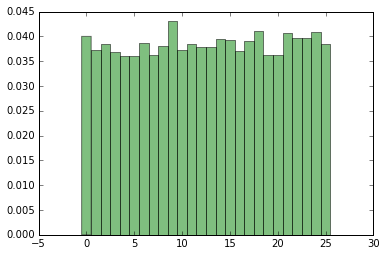

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
mask = gen('NVIKKIH','CTSQEOU', 'DNGDKSZ', 'EAIWDSH')
data = [next(mask) for i in range(10000)]
bins = range(27)
plt.hist(data, bins, align = 'left', normed=1, facecolor='green', alpha=0.5)
plt.show()

Mais certains mots-clés donnent une répartition curieuse. J'appelle *alphabet faible*, un alphabet qui associe à toute lettre de rang pair une lettre de rang pair (autrement dit l'ensemble des lettres de rang pair $\{A, C, E, G, I, K, M, O, Q, S, U, W, Y\}$ est globalement invariant par la substitution associée à l'alphabet).  
Les alphabets-Spirale faibles sont très rares mais ils existent. On peut en trouver en cherchant bien ... au hasard.

In [27]:
def is_weak_alpha(alpha):
    """Teste si un alphabet est faible"""
    for j in range(0, 26, 2):
        if (alpha[j]%2):  # si une image est impaire, c'est faux
            return(False)
    return(True)

In [28]:
from random import randrange
def get_random_key():
    """Retourne un mot-clé aléatoire de 7 lettres"""
    return(rng2str([randrange(26) for i in range(7)]))

La fonction suivante teste un certain nombre de mots-clés tirés au hasard pour sélectionner ceux qui donnent un alphabet faible.

In [29]:
def search_weak_key(nb_essais):
    """Recherche un mot-clé qui donne un alphabet-Spirale faible"""
    keylist = []
    for i in range(nb_essais):
        key = get_random_key()
        alpha = alpha_spirale(key)
        if is_weak_alpha(alpha):
            keylist.append(key)
    return(keylist)

Il faut tester un grand nombre de mots-clés avant d'en trouver quelques-uns qui soient faibles.

In [30]:
search_weak_key(10000000)

['JAIEGUB']

En lançant la fonction plusieurs fois on trouve des mots-clés faibles, comme 'RMCIZVK', 'ZIOAING', 'FZAKYPM', 'RAUKCGA', 'TGICVUQ', 'JAEACOA', 'TCQEOFH', 'JIXDRNL', 'ZWYTPCA', 'TYZXAEM','PGMMQIQ', 'VSHVIAA', 'JOPJEOY' ...etc

Si on prend des mots-clés faibles pour *key1* et *key2* et si les mots-clés *key3* et *key4* ne contiennent que des lettres de rang pair alors le générateur aléatoire ne donne que des nombres pairs (la somme de deux nombres pairs est un nombre pair) :

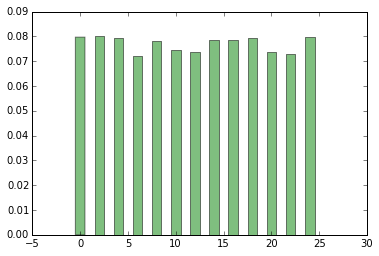

In [31]:
mask = gen('ZIOAING','FZAKYPM', 'ACEGIKM', 'COQSUWY')
data = [next(mask) for i in range(10000)]
bins = range(27)
plt.hist(data, bins, align = 'left', normed=1, facecolor='green', alpha=0.5)
plt.show()

La distribution n'est plus uniforme. Le chiffrement n'utilise que 13 alphabets sur les 26.  
Heureusement, les mots-clés faibles sont très rares ( 1 sur 10 millions ?).  
Il est à noter qu'il suffit d'une seule lettre de rang impair dans *key3* ou *key4* pour rétablir l'uniformité :

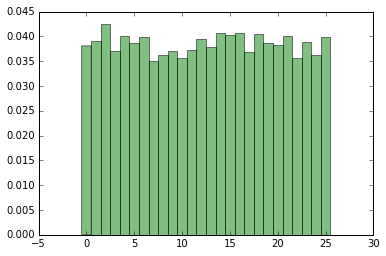

In [32]:
mask = gen('ZIOAING','FZAKYPM', 'BCEGIKM', 'COQSUWY')
data = [next(mask) for i in range(10000)]
bins = range(27)
plt.hist(data, bins, align = 'left', normed=1, facecolor='green', alpha=0.5)
plt.show()

### Vecteur d'initialisation

Si on cherche à retrouver les clés *key3* et *key4* à partir d'un VI, on trouve 26 paires de clés équivalentes. En effet, reprenons le tableau carré obtenu avec les quatre clés précédentes (tableau de gauche). En remplaçant les lettres par leur ordre on obtient le tableau du milieu. Si on ajoute 1 à chaque nombre de la marge supérieure et si on retire 1 à chaque nombre de la marge de gauche on obtient le tableau de droite, dont l'intérieur reste inchangé. 
```
   E_A_I_W_D_S_H            18_12_09_17_01_06_10            19_13_10_18_02_07_11
D: B V S A K P T        09: 01 21 18 00 10 15 19        08: 01 21 18 00 10 15 19
N: H B Y G Q V Z        15: 07 01 24 06 16 21 25        14: 07 01 24 06 16 21 25
G: U O L T D I M        02: 20 14 11 19 03 08 12        01: 20 14 11 19 03 08 12
D: B V S A K P T        09: 01 21 18 00 10 15 19        08: 01 21 18 00 10 15 19
K: G A X F P U Y        14: 06 00 23 05 15 20 24        13: 06 00 23 05 15 20 24
S: O I F N X C G        22: 14 08 05 13 23 02 06        21: 14 08 05 13 23 02 06
Z: P J G O Y D H        23: 15 09 06 14 24 03 07        22: 15 09 06 14 24 03 07
```
Il est clair que l'on obtiendrait le même résultat si au lieu d'ajouter et de retrancher 1, on ajoutait et retranchait un entier $k$ quelconque entre $0$ et $25$.

Écrivons une fonction qui donne les 26 paires de clés équivalentes correspondant à un VI donné.

In [33]:
def get_keys_pairs(key1, key2, IV):
    f = alpha_spirale(key1)
    g = alpha_spirale(key2)
    nk3 = [0]*7      # clé numérique 3
    nk4 = [0]*7      # clé numérique 4
    keys_pairs = []  # liste des paires de clés
    for k in range(26):
        nk3[0] = f[k]
        i = 1
        for j in [1, 3, 6, 10, 15, 21]:
            nk3[i] = f[(IV[j]-IV[0]+k)%26];
            i += 1
        i = 0
        for j in [0, 2, 5, 9, 14, 20, 27]:
            nk4[i] = g[IV[j]-k]
            i += 1
        keys_pairs.append([rng2str(nk3), rng2str(nk4)])  
    return(keys_pairs )

In [34]:
IV = get_IV('NVIKKIH', 'CTSQEOU', 'DNGDKSZ', 'EAIWDSH')
kp = get_keys_pairs( 'NVIKKIH', 'CTSQEOU', IV )
kp

[['MOAMYPK', 'DGEXHPC'],
 ['QWXQOKN', 'XVWRIFE'],
 ['GRBGWNT', 'RCUYMNW'],
 ['VDSVRTJ', 'YEPZOAU'],
 ['ILZIDJC', 'ZWFKSBP'],
 ['YUHYLCA', 'KUNGTHF'],
 ['OEFOUAX', 'GPAVLIN'],
 ['WPMWEXB', 'VFBCQMA'],
 ['RKQRPBS', 'CNHEJOB'],
 ['DNGDKSZ', 'EAIWDSH'],
 ['LTVLNZH', 'WBMUXTI'],
 ['UJIUTHF', 'UHOPRLM'],
 ['ECYEJFM', 'PISFYQO'],
 ['PAOPCMQ', 'FMTNZJS'],
 ['KXWKAQG', 'NOLAKDT'],
 ['NBRNXGV', 'ASQBGXL'],
 ['TSDTBVI', 'BTJHVRQ'],
 ['JZLJSIY', 'HLDICYJ'],
 ['CHUCZYO', 'IQXMEZD'],
 ['AFEAHOW', 'MJROWKX'],
 ['XMPXFWR', 'ODYSUGR'],
 ['BQKBMRD', 'SXZTPVY'],
 ['SGNSQDL', 'TRKLFCZ'],
 ['ZVTZGLU', 'LYGQNEK'],
 ['HIJHVUE', 'QZVJAWG'],
 ['FYCFIEP', 'JKCDBUV']]

Vérifions que les 26 paires de clés sont bien équivalentes.

In [35]:
crypto = 'HXYYEQXLUFBJQLAHYTYMHXONCHQKYEAWSJRRREUQQWNKGIUNWNMTRSPDXFONSMCJHAEDFKZQAFL'
for p in kp:
    clair = déchiffrer('NVIKKIH','CTSQEOU',p[0], p[1], crypto)
    if clair != 'SPIRALEISAONETIMEPADCRYPTOSYSTEMDESIGNEDTOREPLACESOLITAIREWHENONEHASNOCARDS':
        print(False)
print(True)
    

True


Il en résulte que les $26^7\times 26^7$ paires de mots clés possibles, n'engendrent que $26^{13}$ vecteurs d'initialisation différents.  
La complexité du système est donc $26^7\times 26^7\times 26^{13}= 26^{27} \approx 2^{126.9}$

In [36]:
from math import log2
log2(26**27)

126.91187238980949

La complexité du système Spirale est d'un peu moins de 127 bits.

### Reconstruction d'un VI

Reprenons la table qui permet de construire le vecteur d'initialisation mais sans tenir compte des valeurs marginales obtenues par les mots-clés.
```
          ??_??_??_??_??_??_??
      ??: 01 21 18 00 10 15 19   
      ??: 07 01 24 06 16 21 25        a............b
      ??: 20 14 11 19 03 08 12        .            .
      ??: 01 21 18 00 10 15 19        .            .
      ??: 06 00 23 05 15 20 24        c............d
      ??: 14 08 05 13 23 02 06        
      ??: 15 09 06 14 24 03 07 
```
Si on prend dans le tableau quatre cellules aux sommets d'un rectangle $a$, $b$, $c$, $d$, on a alors la relation $$a-c \equiv b-d \mod{26}$$
Cette relation est une conséquence directe de la nature additive du tableau.  
On peut donc, connaissant trois de ces nombres, calculer le quatrième par une sorte de règle de trois additive.

Il en résulte que l'on peut reconstruire tout le tableau si on en connaît seulement un ligne et une colonne (c'est-à-dire 13 valeurs) et ceci sans connaître ni les deux mots-clés ni les substitutions $f$ et $g$.  
Supposons que l'on connaisse la troisième ligne et la cinquième colonne du tableau précédent :
```
          ??_??_??_??_??_??_??
      ??:        y    10     
      ??:             16     x
      ??: 20 14 11 19 03 08 12  
      ??:             10  
      ??:     z       15  
      ??:             23  t    
      ??:             24  
```
On peut calculer, par exemple :
$$\begin{eqnarray}
x & \equiv & 16-3+12 \equiv 25 \mod(26)\\
y & \equiv & 10-3+11 \equiv 18 \mod(26)\\
z & \equiv & 15-3+14 \equiv 0 \mod(26)\\
t & \equiv & 23-3+8 \equiv 2 \mod(26)\\
\end{eqnarray}
$$

Pour une attaque en force brute sur le VI le plus commode est de considérer la première ligne et la première colonne.

$$
\begin{array}{c}
i_0 & i_2 & i_4 & i_6 & i_8 & i_{10}& i_{12}\\
i_1 & a   &  c\\
i_3 & b\\
i_5\\
i_7\\
i_9\\
i_{11}
\end{array}
$$

En faisant varier les $6$ valeurs $i_0 \ldots i_5 $, on obtient les $9$ premières composantes du VI :
$$
( i_0,\, i_1,\, i_2,\, i_3,\, i_1-i_0+i_2,\, i_4,\, i_5,\, i_3-i_0+i_2,\, i_1-i_0+i_4 )
$$

Si on trouve, par force brute, les 9 premiers caractères du texte clair, on peut fixer les valeurs de $i_0 \ldots i_5 $ et faire varier $i_6 \ldots i_9 $. On a alors les 20 premieres composantes du VI.
De la même manière, si on trouve les 20 premiers caractères du texte clair, on peut fixer $i_0 \ldots i_9 $ et faire varier $i_{10} \ldots i_{12} $. On a les 28 premieres composantes du VI. Une fois trouvés les 28 premiers caractères du texte clair, on a les 13 valeurs $i_0 \ldots i_{12} $ qui permettent le calcul du VI.  
Bilan : on a fractionné une attaque par force brute sur un espace de clés de taille $26^{13}$ (inenvisageable) en trois attaques successives sur des espace de clés de tailles $26^{6}$, $26^{4}$ et $26^{3}$ (long, mais faisable).

Si on veut attaquer par force brute un crypto chiffré avec Spirale, on peut essayer tous les déchiffrements de ses 9 premières lettres pour tous les mots-clés *key1* et *key2* et les valeurs $i_0 \ldots i_5 $ du VI jusqu'à obtenir un début de phrase significatif. Le nombre de cas à essayer est $26^{7}\times 26^{7}\times 26^{6} = 26^{20} \approx 2^{94}$. Cette attaque peut ne pas aboutir car il est difficile, sur 9 lettres, de distinguer ce qui est significatif de ce qui ne l'est pas.

Dans le pire des cas, le système Spirale a une complexité de 94 bits.

In [37]:
log2(26**20)

94.00879436282185

La seule faiblesse du système est d'utiliser les valeurs du VI comme premières valeurs du générateur pseudo-aléatoire. Le VI ne doit servir qu'à l'initialisation. Cela suppose que l'on saute les 49 premières valeurs... ce qui complique beaucoup la procédure papier-crayon.